In [23]:
voter_type='mallows_model'
num_voters=3
num_projects=5
total_op_tokens=300
num_rounds = 100
# Add the directory containing the VotingModel to the Python path
import os
import sys
sys.path.append(os.path.abspath('/Users/idrees/Code/govxs/'))
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np



from util.plot_results import plot_aggregation_results
from model.VotingModel import VotingModel

In [24]:

data_dir = '/Users/idrees/Code/govxs/data'
os.makedirs(data_dir, exist_ok=True)

model = VotingModel(voter_type=voter_type,num_voters=num_voters, num_projects=num_projects, total_op_tokens=total_op_tokens)
model.step()

results_df=model.compile_fund_allocations()

# Save the DataFrame to a CSV file in the data directory
results_df.to_csv(os.path.join(data_dir, 'fund_allocation_data.csv'), index=False)
print(results_df)

voting_df = pd.DataFrame(model.voting_matrix, columns=[f"Project {i+1}" for i in range(model.num_projects)])
voting_df['Voter'] = [f'Voter {i+1}' for i in range(model.num_voters)]

# Save the DataFrame to a CSV file in the data directory
voting_df.to_csv(os.path.join(data_dir, 'voting_data.csv'), index=False)
print(voting_df)

     Project  Mean Aggregation  Median Aggregation  Quadratic Aggregation
0  Project 1         61.000000           59.016393              60.661192
1  Project 2         63.333333           65.901639              61.497316
2  Project 3         60.333333           66.885246              60.014714
3  Project 4         57.333333           52.131148              58.658661
4  Project 5         58.000000           56.065574              59.168117
   Project 1  Project 2  Project 3  Project 4  Project 5    Voter
0       60.0       46.0       68.0       70.0       56.0  Voter 1
1       57.0       67.0       70.0       49.0       57.0  Voter 2
2       66.0       77.0       43.0       53.0       61.0  Voter 3


Summary Statistics:
Mean Aggregation: Total Funds: 300.0, Max Funds: 63.333333333333336, Min Funds: 57.33333333333333
Median Aggregation: Total Funds: 300.0, Max Funds: 66.88524590163935, Min Funds: 52.131147540983605
Quadratic Aggregation: Total Funds: 300.0, Max Funds: 61.497315976743735, Min Funds: 58.65866101029418


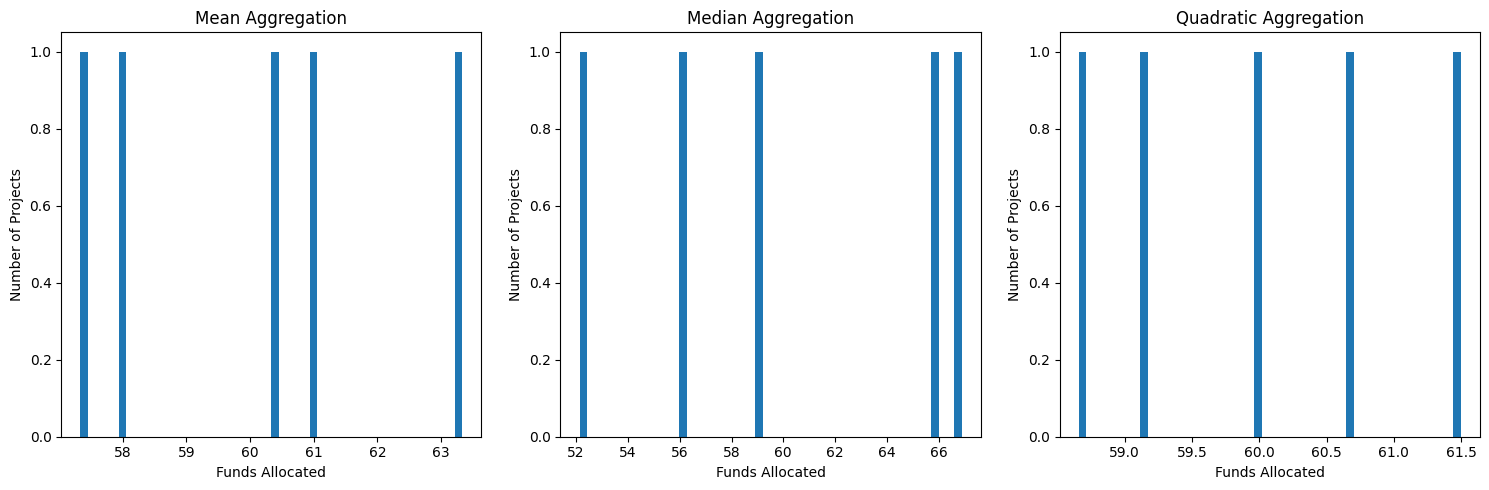

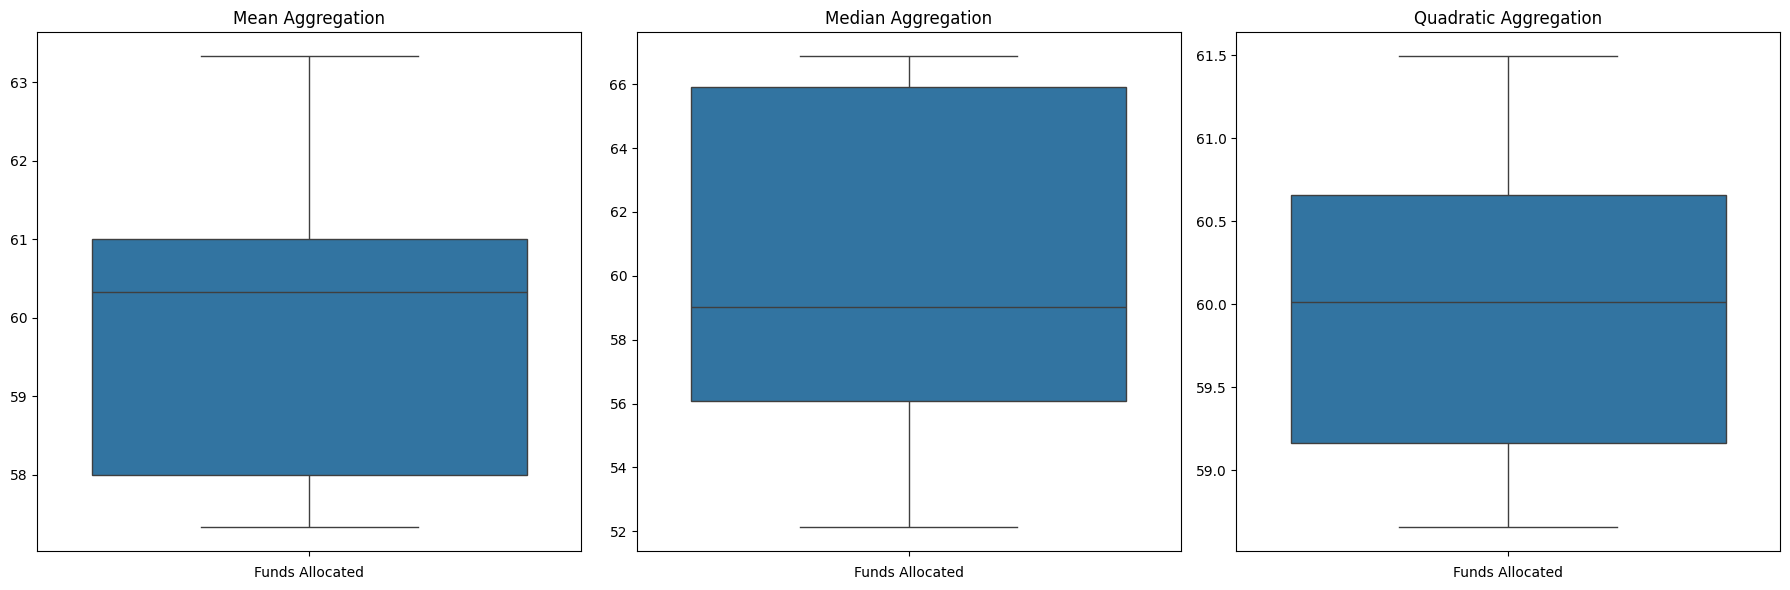

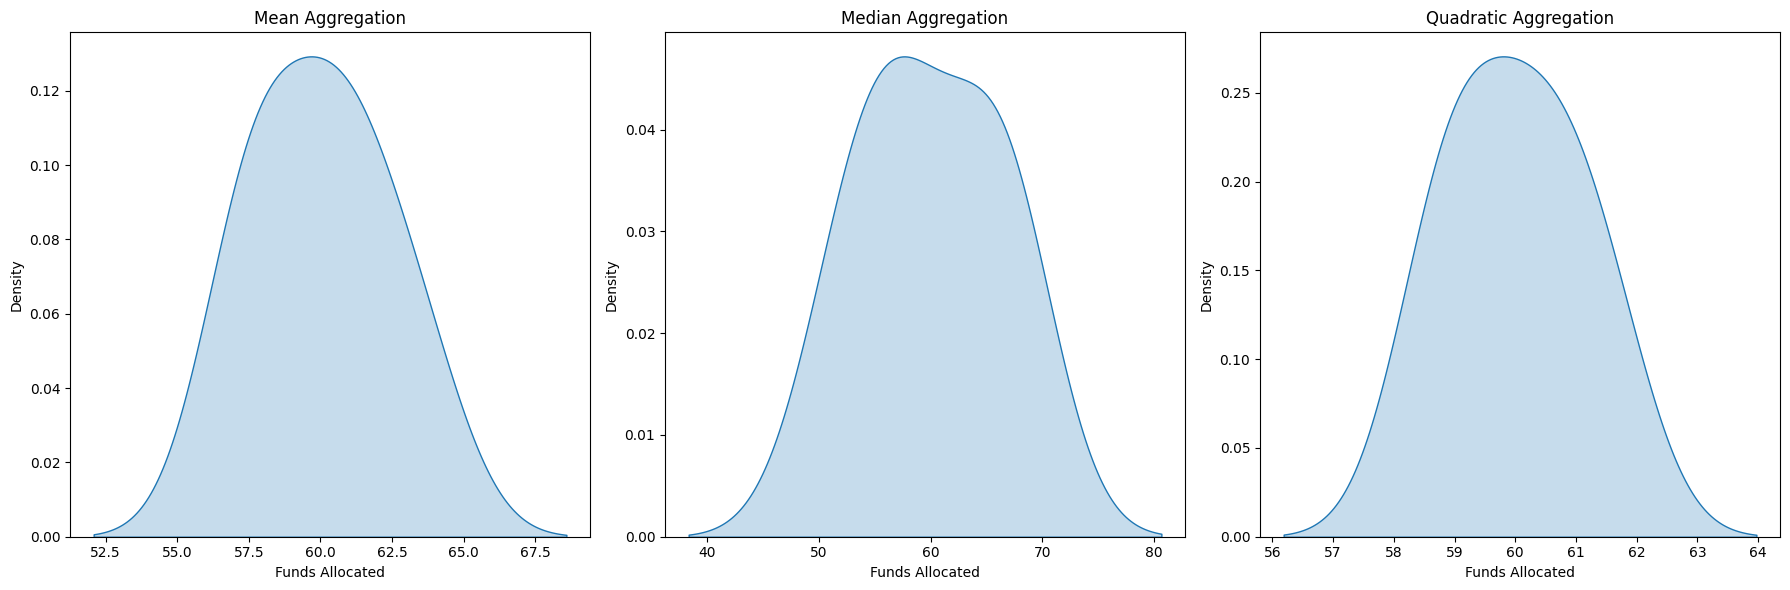

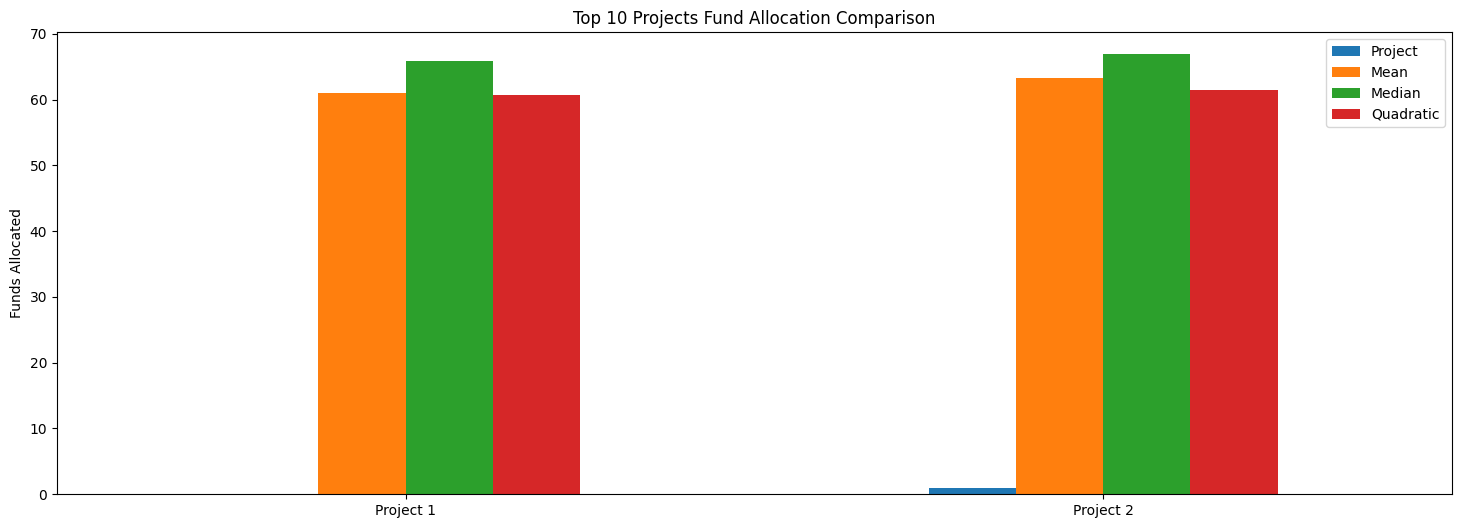

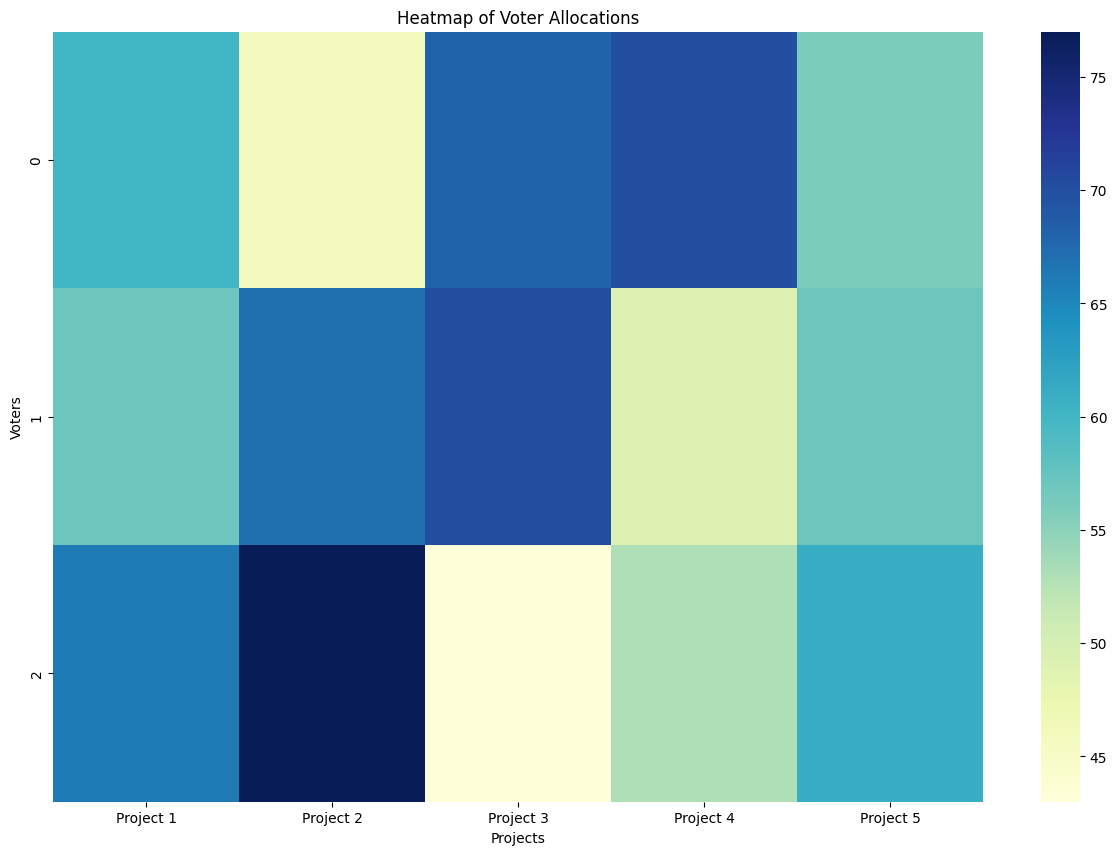

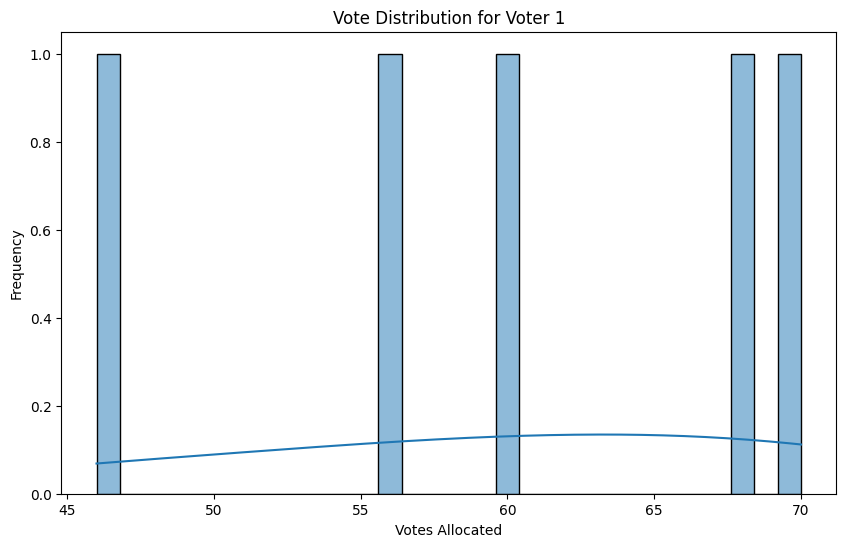

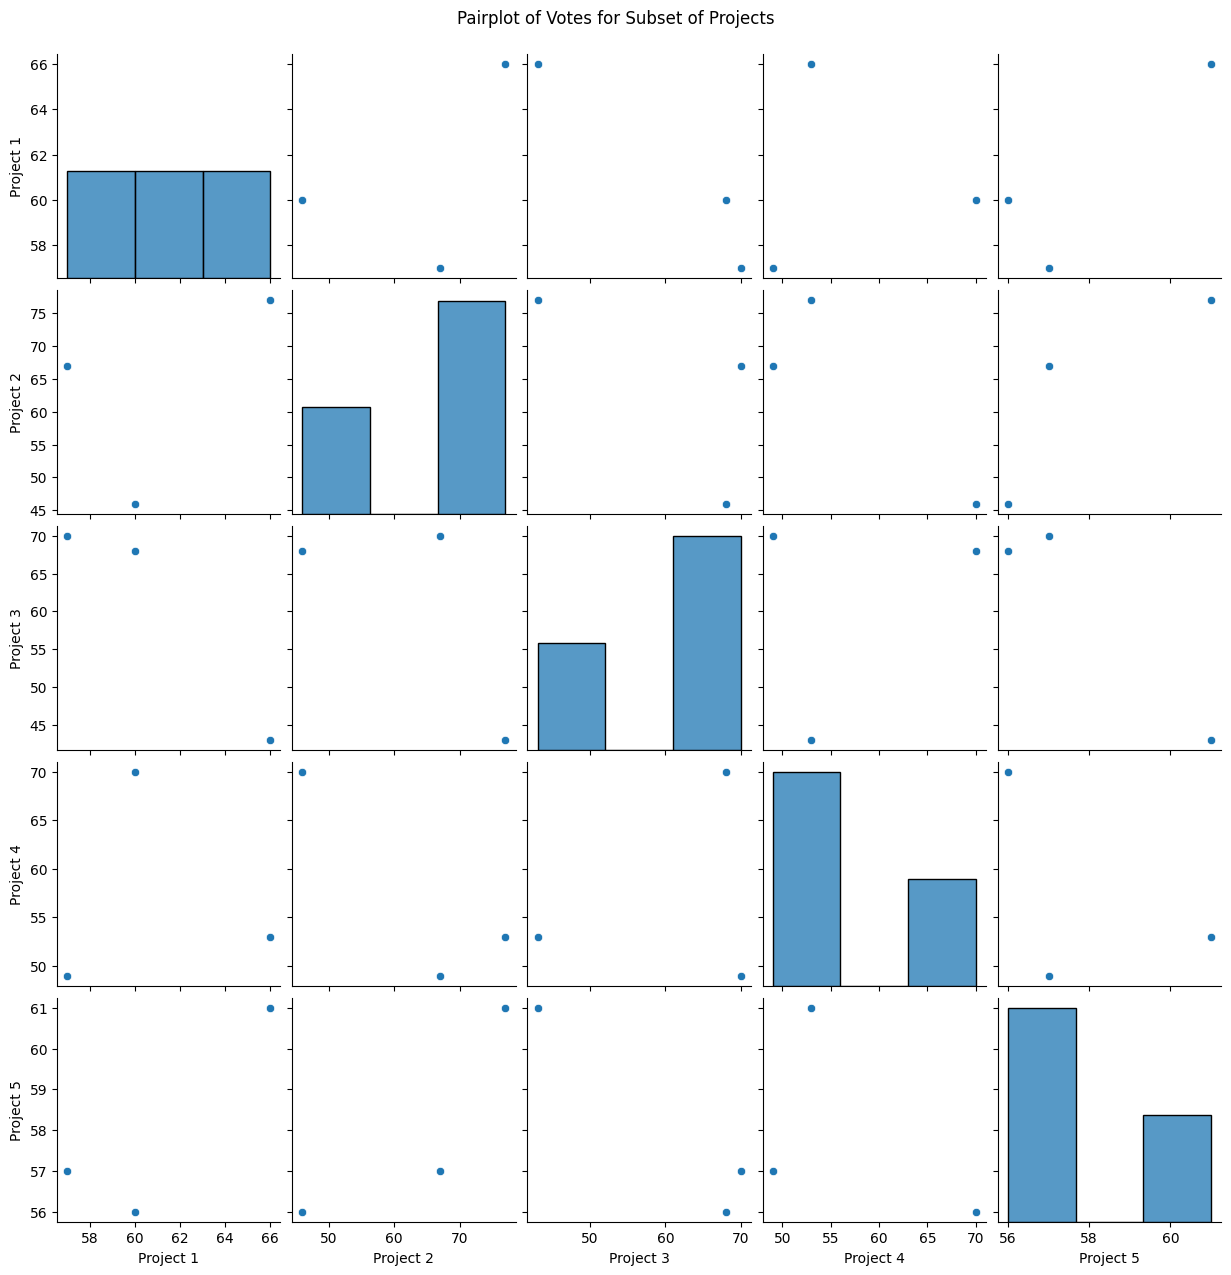

In [27]:

mean_allocations = model.allocate_funds("mean")
median_allocations = model.allocate_funds("median")
quadratic_allocations = model.allocate_funds("quadratic")
plot_aggregation_results(mean_allocations,median_allocations,quadratic_allocations,model.voting_matrix,2)